Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
Summer | AY 2024 - 2025
<hr> | <hr>
<u>**Hands-on Activity 9.1**</u> | <u>**Convolutional Neural Network**</u>
**Name** | Calvadores, Kelly Joseph
**Section** | CPE32S1
**Date Performed**: | July 07, 2024
**Date Submitted**: | July , 2024
**Instructor**: | Engr. Roman M. Richard

<hr>

#Choose any dataset applicable to an image classification problem

#Explain your datasets and the problem being addressed.

- In this activty, I chose 2 different dataset that i had used, the first is the cifar10 and the second is fashion_mnist. The problem the is being addressed is to classify both dataset into one of the 10 items in their own category.

#Show evidence that you can do the following:

##Using your dataset, create a baseline model of the CNN

In [ ]:
import time
Start_Time = time.time()
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

In [ ]:
def LoadDataset():
  (trainX, trainY), (testX, testY) = cifar10.load_data()
  trainX = trainX.reshape((trainX.shape[0], 32, 32, 3))
  testX = testX.reshape((testX.shape[0], 32, 32, 3))

  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  return trainX, trainY, testX, testY

def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [ ]:
def DefineModel():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

def EvaluateModel(dataX, dataY, n_folds=5):
  scores, histories = list(), list()
  kfold = KFold(n_folds, shuffle=True, random_state=1)
  for train_ix, test_ix in kfold.split(dataX):
    model = DefineModel()
    trainX, trainy, testX, testy = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
    history = model.fit(trainX, trainy, epochs=100, batch_size=1000, validation_data=(testX, testy), verbose=0)
    _, acc = model.evaluate(testX, testy, verbose=0)
    print('> %.3f' % (acc * 100.0))
    scores.append(acc)
    histories.append(history)
  return scores, histories

In [ ]:
def SummarizeHistory(histories):
  for i in range(len(histories)):
    plt.subplot(2, 1, 1)
    plt.title('Cross Entropy Loss')
    plt.plot(histories[i].history['loss'], color='blue', label='train')
    plt.plot(histories[i].history['val_loss'], color='orange', label='test')
    plt.subplot(2, 1, 2)
    plt.title('Classification Accuracy')
    plt.plot(histories[i].history['accuracy'], color='blue', label='train')
    plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
  plt.show()

def SummarizePerformance(scores):
  print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
  plt.boxplot(scores)
  plt.show()

> 9.810


> 9.620


> 9.500


> 9.400
> 10.220


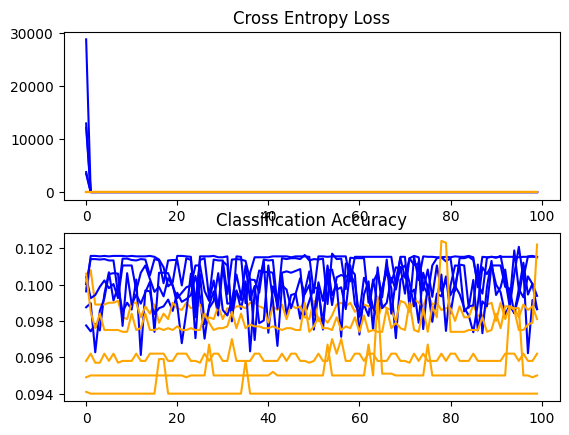

Accuracy: mean=9.710 std=0.289, n=5


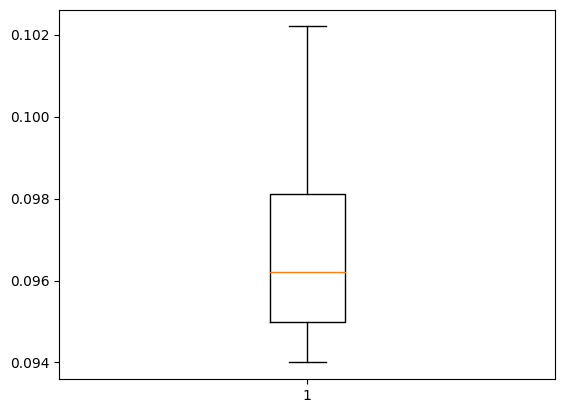

Elapsed Time: 1963.3227407932281 seconds


In [ ]:
def RunTestHarness():
  trainX, trainY, testX, testY = LoadDataset()
  scores, histories = EvaluateModel(trainX, trainY)
  SummarizeHistory(histories)
  SummarizePerformance(scores)

RunTestHarness()

End_Time = time.time()
Elapsed_Time = End_Time - Start_Time
print("Elapsed Time:", Elapsed_Time, "seconds")

**Observation:**
As seen in the figures or images, the model is messy compare in the modules, the reason is that it might learn too well and create a noise instead of going along the line.

In [ ]:
def DefineModel():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

> 9.860


> 9.870


> 9.500


> 9.400
> 9.970


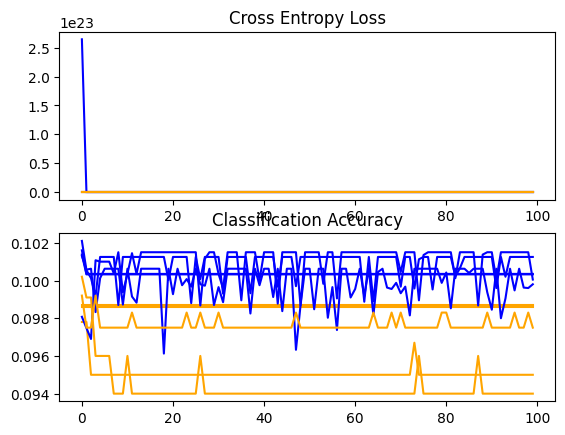

Accuracy: mean=9.720 std=0.226, n=5


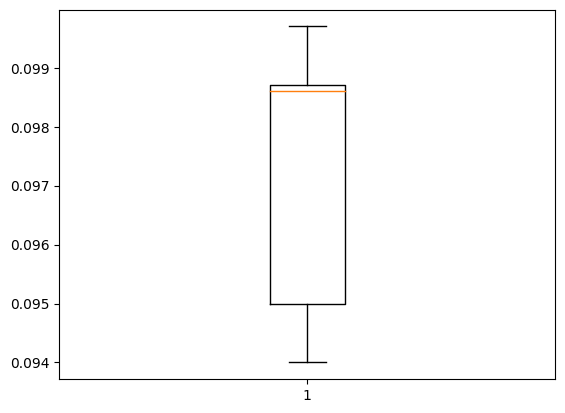

Elapsed Time: 2590.1185982227325 seconds


In [ ]:
RunTestHarness()

End_Time = time.time()
Elapsed_Time = End_Time - Start_Time
print("Elapsed Time:", Elapsed_Time, "seconds")

**Observation:**
As seen in the images above, it is much clear compare to the previous but not quite enough.

In [ ]:
def RunTestHarness():
  trainX, trainY, testX, testY = LoadDataset()
  trainX, testX = prep_pixels(trainX, testX)
  model = DefineModel()
  model.fit(trainX, trainY, epochs=100, batch_size=1000, verbose=0)
  model.save('/content/drive/MyDrive/CPE 019 (Retake)/Assignment 9.1/CNNmodel.h5')

RunTestHarness()

End_Time = time.time()
Elapsed_Time = End_Time - Start_Time
print("Elapsed Time:", Elapsed_Time, "seconds")

Elapsed Time: 2773.8991510868073 seconds


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
def RunTestHarness():
  trainX, trainY, testX, testY = LoadDataset()
  trainX, testX = prep_pixels(trainX, testX)
  model = load_model('/content/drive/MyDrive/CPE 019 (Retake)/Assignment 9.1/CNNmodel.h5')
  _, acc = model.evaluate(testX, testY, verbose=0)
  print('> %.3f' % (acc * 100.0))

RunTestHarness()

> 67.550


In [ ]:
from numpy import argmax
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import load_model

def load_image(filename):
  img = load_img(filename, grayscale=True, target_size=(32, 32))
  img = img_to_array(img)
  img = img.reshape(1, 32, 32, 3)
  img = img.astype('float32')
  img = img / 255.0
  return img

def run_example():
  (trainX, trainY), (testX, testY) = cifar10.load_data()
  trainX = trainX.astype('float32') / 255.0
  sample_image = trainX[0]
  sample_image = sample_image.reshape(1, 32, 32, 3)
  model = load_model('/content/drive/MyDrive/CPE 019 (Retake)/Assignment 9.1/CNNmodel.h5')
  predict_value = model.predict(sample_image)
  digit = argmax(predict_value)
  print(digit)

# entry point, run the example
run_example()

1/1 [==============================] - 0s 224ms/step
6


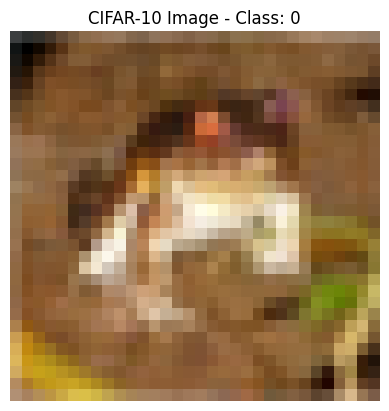

In [ ]:
from PIL import Image

def load_image(index):
    (X_train, _), (_, _) = cifar10.load_data()
    image = X_train[index]
    plt.imshow(image)
    plt.title(f"CIFAR-10 Image - Class: {index}")
    plt.axis('off')
    plt.show()

image_index = 0
load_image(image_index)


**Observation:**
As seen in the result, The prediction is correct but the accuracy is low, with the percentage of 67%. There is a chance that it still might go wrong.

##Perform image augmentation

In [ ]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

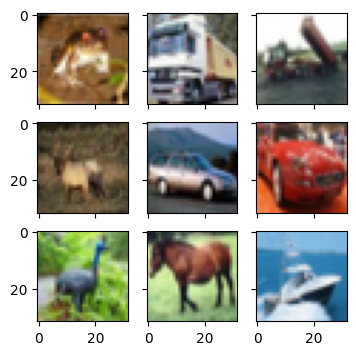

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
fig, ax = plt.subplots(3, 3, sharex = True, sharey = True, figsize = (4, 4))
for i in range(3):
  for j in range(3):
    ax[i][j].imshow(X_train[i * 3 + j], cmap = plt.get_cmap('gray'))
plt.show()

##Perform feature standardization

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

DataGen = ImageDataGenerator(featurewise_center = True, featurewise_std_normalization = True)

-1.9892113 -0.08899898 2.1267967


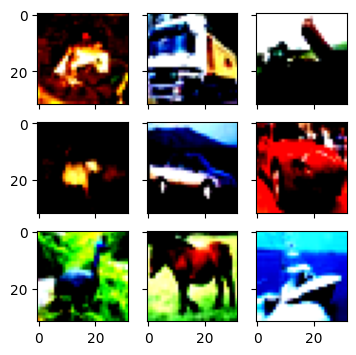

In [ ]:
DataGen.fit(X_train)
for X_batch, y_batch in DataGen.flow(X_train, y_train, batch_size = 9, shuffle = False):
  print(X_batch.min(), X_batch.mean(), X_batch.max())
  fig, ax = plt.subplots(3, 3, sharex = True, sharey = True, figsize = (4, 4))
  for i in range(3):
    for j in range(3):
      ax[i][j].imshow(X_batch[i * 3 + j], cmap = plt.get_cmap('gray'))
  plt.show()
  break

**Observation:**
As seen in the result, the Feature Standardation has applied, the images is sharpen although the image is blurry.

-2.002114 -0.09202043 2.5096273


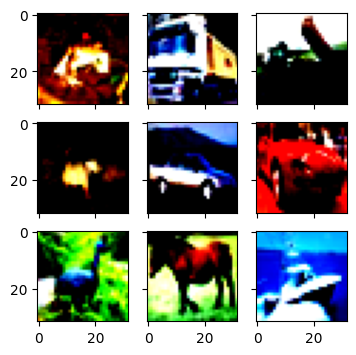

In [ ]:
DataGen.mean = X_train.mean(axis=0)
DataGen.std = X_train.std(axis=0)
for X_batch, y_batch in DataGen.flow(X_train, y_train, batch_size = 9, shuffle = False):
  print(X_batch.min(), X_batch.mean(), X_batch.max())
  fig, ax = plt.subplots(3, 3, sharex = True, sharey = True, figsize = (4, 4))
  for i in range(3):
    for j in range(3):
      ax[i][j].imshow(X_batch[i * 3 + j], cmap = plt.get_cmap('gray'))
  plt.show()
  break

##Perform ZCA whitening of your images


In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32') /255.0
X_test = X_test.astype('float32') / 255.0
DataGen = ImageDataGenerator(zca_whitening = True, featurewise_center = True, featurewise_std_normalization = True)

170498071/170498071 [==============================] - 4s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1451: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn(


check/n
-8.875162 -0.0023781403 8.505833


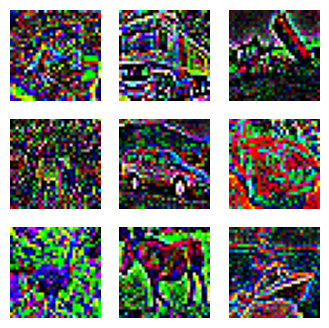

In [ ]:
X_mean = X_train.mean(axis = 0)
DataGen.fit(X_train - X_mean)
print("check/n")
for X_batch, y_batch in DataGen.flow(X_train - X_mean, y_train, batch_size = 9, shuffle = False):
  print(X_batch.min(), X_batch.mean(), X_batch.max())
  fig, ax = plt.subplots(3, 3, sharex = True, sharey = True, figsize = (4, 4))
  for i in range(3):
    for j in range(3):
      img = np.clip(X_batch[i * 3 + j], 0, 1)
      ax[i][j].imshow(img)
      ax[i][j].axis('off')
  plt.show()
  break

**Observation:**
In the Result for this code, ZCA whitening is applied to the images, but for some reason, for i think it is not applied due to either distorted or it create color noise. I should make a manual or to see if it is still the same

In [1]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

flat_train_images = X_train.reshape(X_train.shape[0], -1)
sigma = np.dot(flat_train_images.T, flat_train_images) / flat_train_images.shape[0]
U, S, V = np.linalg.svd(sigma)

epsilon = 1e-5
zca_matrix = np.dot(U, np.dot(np.diag(1.0 / np.sqrt(S + epsilon)), U.T))

170498071/170498071 [==============================] - 4s 0us/step


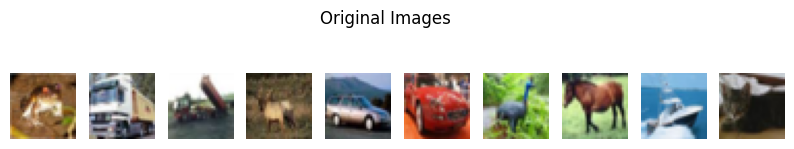

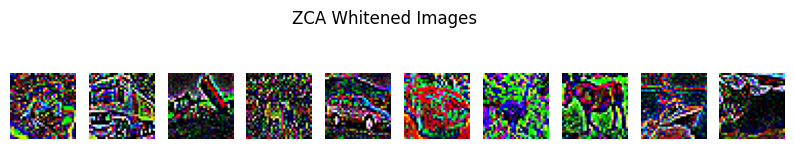

In [3]:
whitened_train_images = np.dot(flat_train_images, zca_matrix)
whitened_train_images = whitened_train_images.reshape(X_train.shape)

def plot_images(images, title):
    plt.figure(figsize=(10, 2))
    for i in range(10):
        plt.subplot(1, 10, i + 1)
        plt.imshow(np.clip(images[i], 0, 1))  # Clip the values to the range [0, 1]
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

plot_images(X_train, 'Original Images')
plot_images(whitened_train_images, 'ZCA Whitened Images')

**Observation:**
This code is from ChatGPT for manualling whitening or manually zca whitening the images from cifar10, and it seems the zca whitening is applied in the previous code.

##Augment data with random rotations, shifts, and flips

###Random Rotation

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
DataGen = ImageDataGenerator(rotation_range = 90)

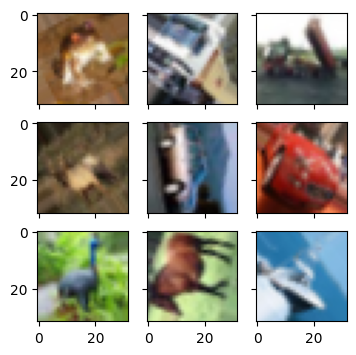

In [ ]:
for X_batch, y_batch in DataGen.flow(X_train, y_train, batch_size = 9, shuffle = False):
  fig, ax = plt.subplots(3, 3, sharex = True, sharey = True, figsize = (4, 4))
  for i in range(3):
    for j in range(3):
      ax[i][j].imshow(X_batch[i * 3 + j].reshape(32, 32, 3), cmap = plt.get_cmap('gray'))
  plt.show()
  break

**Observation:**
As seen in the result above, the code are succesfully implemented but for some reason the some images are the only ones that rotated 90 degrees while the other is random

###Random Shifts

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
shift = 0.2
DataGen = ImageDataGenerator(width_shift_range = shift, height_shift_range = shift)

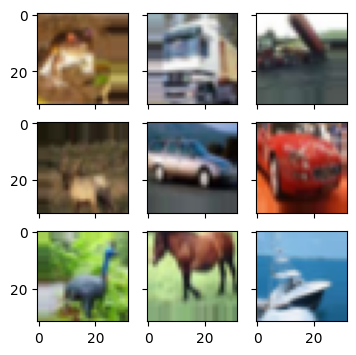

In [ ]:
for X_batch, y_batch in DataGen.flow(X_train, y_train, batch_size = 9, shuffle = False):
  fig, ax = plt.subplots(3, 3, sharex = True, sharey = True, figsize = (4, 4))
  for i in range(3):
    for j in range(3):
      ax[i][j].imshow(X_batch[i * 3 + j].reshape(32, 32, 3), cmap = plt.get_cmap('gray'))
  plt.show()
  break

**Observation:**
As seen in the result, all images is either slight elevated or shift but most of them is shifted to the random direction.

###Random Flip

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
DataGen = ImageDataGenerator(horizontal_flip = True, vertical_flip = True)

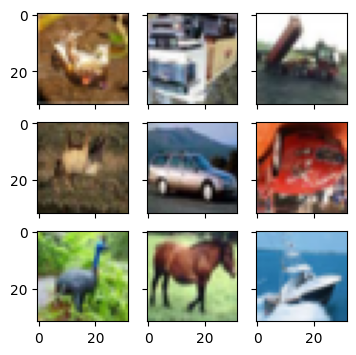

In [ ]:
for X_batch, y_batch in DataGen.flow(X_train, y_train, batch_size = 9, shuffle = False):
  fig, ax = plt.subplots(3, 3, sharex = True, sharey = True, figsize = (4, 4))
  for i in range(3):
    for j in range(3):
      ax[i][j].imshow(X_batch[i * 3 + j].reshape(32, 32, 3), cmap = plt.get_cmap('gray'))
  plt.show()
  break

**Observation:**
In this result, all images is flip randomly, either horizontal or vertical.

##Save augmented image data to disk

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
DataGen = ImageDataGenerator(horizontal_flip = True, vertical_flip = True)

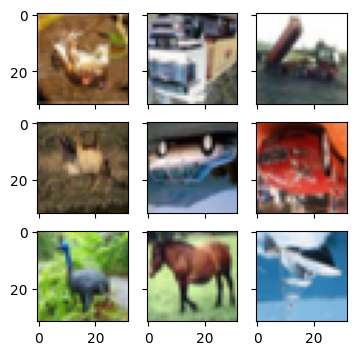

In [ ]:
for X_batch, y_batch in DataGen.flow(X_train, y_train, batch_size = 9, shuffle = False, save_to_dir = '/content/drive/MyDrive/CPE 019 (Retake)/Assignment 9.1',
                                     save_prefix = 'aug', save_format = 'png'):
  fig, ax = plt.subplots(3, 3, sharex = True, sharey = True, figsize = (4, 4))
  for i in range(3):
    for j in range(3):
      ax[i][j].imshow(X_batch[i * 3 + j].reshape(32, 32, 3), cmap = plt.get_cmap('gray'))
  plt.show()
  break

##Develop a test harness to develop a robust evaluation of a model and establish a baseline of performance for a classification task

4422102/4422102 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


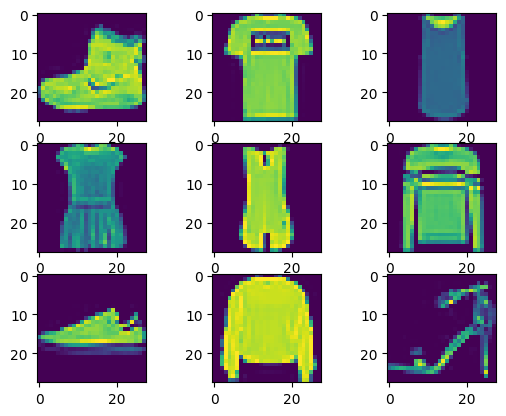

In [ ]:
from matplotlib import pyplot
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

for i in range(9):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(X_train[i])

pyplot.show()

In [ ]:
import sys
from matplotlib import pyplot
from tensorflow.keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

In [ ]:
def LoadDataset():
  (trainX, trainY), (testX, testY) = fashion_mnist.load_data()
  trainY= to_categorical(trainY)
  testY = to_categorical(testY)
  trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
  testX = testX.reshape((testX.shape[0], 28, 28, 1))
  return trainX, trainY, testX, testY

def PrepPixels(Train, Test):
  train_norm = Train.astype('float32')
  test_norm = Test.astype('float32')
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  return train_norm, test_norm

In [ ]:
def CNNModel():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(20, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

def SummarizeDiagnostic(history):
  pyplot.subplot(211)
  pyplot.title('Cross Entropy Loss')
  pyplot.plot(history.history['loss'], color='blue', label='train')
  pyplot.plot(history.history['val_loss'], color='orange', label='test')

  pyplot.subplot(212)
  pyplot.title('Classification Accuracy')
  pyplot.plot(history.history['accuracy'], color='blue', label='train')
  pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

  filename = sys.argv[0].split('/')[-1]
  pyplot.savefig(filename + '_plot.png')
  pyplot.close()

In [ ]:
def SummarizeHistory(histories):
  for i in range(len(histories)):
    plt.subplot(2, 1, 1)
    plt.title('Cross Entropy Loss')
    plt.plot(histories[i].history['loss'], color='blue', label='train')
    plt.plot(histories[i].history['val_loss'], color='orange', label='test')
    plt.subplot(2, 1, 2)
    plt.title('Classification Accuracy')
    plt.plot(histories[i].history['accuracy'], color='blue', label='train')
    plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
  plt.show()

In [ ]:
def RunTestHarness2():
  (trainX, trainY, testX, testY) = LoadDataset()
  trainX, testX = PrepPixels(trainX, testX)
  model = CNNModel()
  history = model.fit(trainX, trainY, epochs=50, batch_size=500, validation_data=(testX, testY), verbose=1)
  _, acc = model.evaluate(testX, testY, verbose=0)
  print('> %.3f' % (acc * 100.0))
  SummarizeDiagnostic(history)

In [ ]:
RunTestHarness2()

Epoch 1/50
120/120 [==============================] - 37s 307ms/step - loss: 0.7164 - accuracy: 0.7418 - val_loss: 0.4870 - val_accuracy: 0.8232
Epoch 2/50
120/120 [==============================] - 32s 266ms/step - loss: 0.4342 - accuracy: 0.8487 - val_loss: 0.4242 - val_accuracy: 0.8469
Epoch 3/50
120/120 [==============================] - 31s 261ms/step - loss: 0.3907 - accuracy: 0.8629 - val_loss: 0.4149 - val_accuracy: 0.8529
Epoch 4/50
120/120 [==============================] - 31s 261ms/step - loss: 0.3643 - accuracy: 0.8731 - val_loss: 0.4017 - val_accuracy: 0.8555
Epoch 5/50
120/120 [==============================] - 32s 263ms/step - loss: 0.3557 - accuracy: 0.8759 - val_loss: 0.3932 - val_accuracy: 0.8597
Epoch 6/50
120/120 [==============================] - 32s 264ms/step - loss: 0.3386 - accuracy: 0.8816 - val_loss: 0.3625 - val_accuracy: 0.8740
Epoch 7/50
120/120 [==============================] - 31s 256ms/step - loss: 0.3191 - accuracy: 0.8883 - val_loss: 0.3535 - val_ac

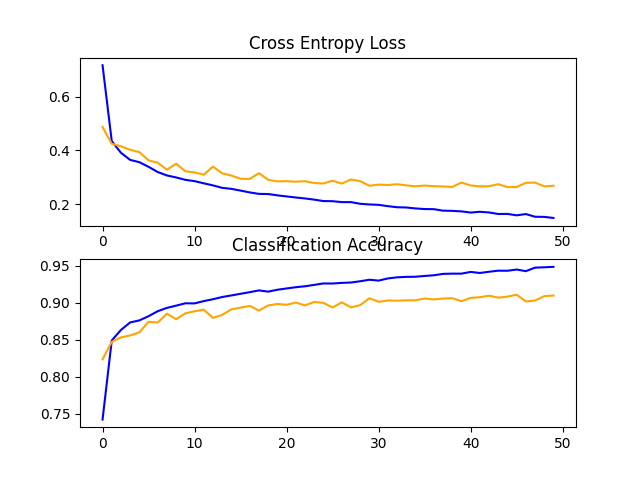

In [ ]:
from PIL import Image

def load_image(file_path):
    """
    Load an image file and return a PIL Image object.

    Args:
        file_path (str): The file path of the image file.

    Returns:
        Image: A PIL Image object.
    """
    try:
        image = Image.open(file_path)
        return image
    except IOError:
        print("Unable to load image")
        return None
load_image('/content/colab_kernel_launcher.py_plot.png')



**Observation:**
In this part of code, it execute too long, it takes several minutes to finish the execution, the accuracy is 90% percent and it is great but it can improve more.

##Explore extensions to a baseline model to improve learning and model capacity.

In [ ]:
import time
start_time = time.time()
import sys
from matplotlib import pyplot
from tensorflow.keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import Dropout

In [ ]:
def LoadDataset():
  (trainX, trainY), (testX, testY) = fashion_mnist.load_data()
  trainY= to_categorical(trainY)
  testY = to_categorical(testY)
  trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
  testX = testX.reshape((testX.shape[0], 28, 28, 1))
  return trainX, trainY, testX, testY

def PrepPixels(Train, Test):
  train_norm = Train.astype('float32')
  test_norm = Test.astype('float32')
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  return train_norm, test_norm

In [ ]:
def CNNModel():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(28, 28, 1)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(40, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dropout(0.2))
  model.add(Dense(30, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dropout(0.2))
  model.add(Dense(10, activation='softmax'))
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

def SummarizeDiagnostic(history):
  pyplot.subplot(211)
  pyplot.title('Cross Entropy Loss')
  pyplot.plot(history.history['loss'], color='blue', label='train')
  pyplot.plot(history.history['val_loss'], color='orange', label='test')

  pyplot.subplot(212)
  pyplot.title('Classification Accuracy')
  pyplot.plot(history.history['accuracy'], color='blue', label='train')
  pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

  filename = sys.argv[0].split('/')[-1]
  pyplot.savefig(filename + '_plot.png')
  pyplot.close()

In [ ]:
def RunTestHarness2():
  (trainX, trainY, testX, testY) = LoadDataset()
  trainX, testX = PrepPixels(trainX, testX)
  model = CNNModel()
  history = model.fit(trainX, trainY, epochs=50, batch_size=328, validation_data=(testX, testY), verbose=1)
  _, acc = model.evaluate(testX, testY, verbose=0)
  print('> %.3f' % (acc * 100.0))
  SummarizeDiagnostic(history)

In [ ]:
RunTestHarness2()
end_time = time.time()

total_time = end_time - start_time
print("Total time taken:", total_time/60, "minutes")

Epoch 1/50
183/183 [==============================] - 121s 658ms/step - loss: 0.9413 - accuracy: 0.6577 - val_loss: 0.4855 - val_accuracy: 0.8307
Epoch 2/50
183/183 [==============================] - 122s 665ms/step - loss: 0.5681 - accuracy: 0.7997 - val_loss: 0.4287 - val_accuracy: 0.8467
Epoch 3/50
183/183 [==============================] - 121s 659ms/step - loss: 0.4909 - accuracy: 0.8284 - val_loss: 0.3819 - val_accuracy: 0.8640
Epoch 4/50
183/183 [==============================] - 122s 666ms/step - loss: 0.4427 - accuracy: 0.8460 - val_loss: 0.3539 - val_accuracy: 0.8769
Epoch 5/50
183/183 [==============================] - 124s 680ms/step - loss: 0.4052 - accuracy: 0.8598 - val_loss: 0.3328 - val_accuracy: 0.8823
Epoch 6/50
183/183 [==============================] - 121s 661ms/step - loss: 0.3762 - accuracy: 0.8688 - val_loss: 0.3242 - val_accuracy: 0.8852
Epoch 7/50
183/183 [==============================] - 121s 658ms/step - loss: 0.3558 - accuracy: 0.8762 - val_loss: 0.3149 -

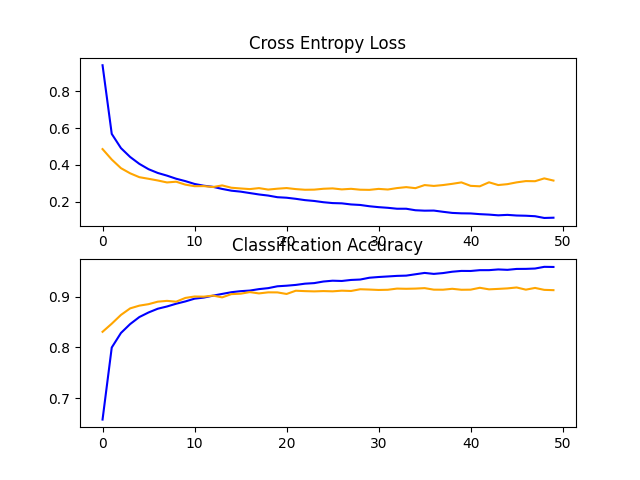

In [ ]:
from PIL import Image

def load_image(file_path):
    """
    Load an image file and return a PIL Image object.

    Args:
        file_path (str): The file path of the image file.

    Returns:
        Image: A PIL Image object.
    """
    try:
        image = Image.open(file_path)
        return image
    except IOError:
        print("Unable to load image")
        return None
load_image('/content/colab_kernel_launcher.py_plot.png')



**Observation:**
In this part of the code, the excution take 1 hour 43 minutes and 22 seconds, it takes too long to execute and I do not know the reason, the accuracy improve a little by 1.28%.

##Develop a finalized model, evaluate the performance of the final model, and use it to make predictions on new images.

In [1]:
import time
start_time = time.time()
import sys
from matplotlib import pyplot
from tensorflow.keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import Dropout

In [2]:
def LoadDataset():
  (trainX, trainY), (testX, testY) = fashion_mnist.load_data()
  trainY= to_categorical(trainY)
  testY = to_categorical(testY)
  trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
  testX = testX.reshape((testX.shape[0], 28, 28, 1))
  return trainX, trainY, testX, testY

def PrepPixels(Train, Test):
  train_norm = Train.astype('float32')
  test_norm = Test.astype('float32')
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  return train_norm, test_norm

In [3]:
def CNNModel():
  model = Sequential()
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(28, 28, 1)))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(85, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dropout(0.2))
  model.add(Dense(75, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dropout(0.2))
  model.add(Dense(75, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dropout(0.2))
  model.add(Dense(10, activation='softmax'))
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model


In [4]:
def RunTestHarness2():
  (trainX, trainY, testX, testY) = LoadDataset()
  trainX, testX = PrepPixels(trainX, testX)
  model = CNNModel()
  history = model.fit(trainX, trainY, epochs=50, batch_size=500, validation_data=(testX, testY), verbose=1)
  model.save('/content/drive/MyDrive/CPE 019 (Retake)/Assignment 9.1/final_model.h5')

In [5]:
RunTestHarness2()
end_time = time.time()

total_time = end_time - start_time
print("Total time taken:", total_time/60, "minutes")

4422102/4422102 [==============================] - 1s 0us/step


Epoch 1/50
120/120 [==============================] - 11s 38ms/step - loss: 1.1174 - accuracy: 0.5829 - val_loss: 0.5350 - val_accuracy: 0.7998
Epoch 2/50
120/120 [==============================] - 4s 34ms/step - loss: 0.5971 - accuracy: 0.7856 - val_loss: 0.4482 - val_accuracy: 0.8394
Epoch 3/50
120/120 [==============================] - 4s 36ms/step - loss: 0.5070 - accuracy: 0.8229 - val_loss: 0.4039 - val_accuracy: 0.8517
Epoch 4/50
120/120 [==============================] - 4s 37ms/step - loss: 0.4546 - accuracy: 0.8406 - val_loss: 0.3701 - val_accuracy: 0.8659
Epoch 5/50
120/120 [==============================] - 4s 36ms/step - loss: 0.4119 - accuracy: 0.8552 - val_loss: 0.3594 - val_accuracy: 0.8683
Epoch 6/50
120/120 [==============================] - 4s 36ms/step - loss: 0.3920 - accuracy: 0.8638 - val_loss: 0.3406 - val_accuracy: 0.8785
Epoch 7/50
120/120 [==============================] - 4s 36ms/step - loss: 0.3656 - accuracy: 0.8724 - val_loss: 0.3252 - val_accuracy: 0.885

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Total time taken: 4.197998615105947 minutes


**Observed:**
In this part of the code, my first run takes me almost an hour but interrupted by crash, the last attempt went smoothly and takes no longer 5 minutes, the accuracy still went up a little by 1%.

In [10]:
import time
start_time = time.time()
import sys
from matplotlib import pyplot
from tensorflow.keras.datasets import fashion_mnist
from keras.models import load_model
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import Dropout

In [11]:
def LoadDataset():
  (trainX, trainY), (testX, testY) = fashion_mnist.load_data()
  trainY= to_categorical(trainY)
  testY = to_categorical(testY)
  trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
  testX = testX.reshape((testX.shape[0], 28, 28, 1))
  return trainX, trainY, testX, testY

def PrepPixels(Train, Test):
  train_norm = Train.astype('float32')
  test_norm = Test.astype('float32')
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  return train_norm, test_norm

In [12]:
def RunTestHarness2():
  (trainX, trainY, testX, testY) = LoadDataset()
  trainX, testX = PrepPixels(trainX, testX)
  model = CNNModel()
  model = load_model('/content/drive/MyDrive/CPE 019 (Retake)/Assignment 9.1/final_model.h5')
  _, acc = model.evaluate(testX, testY, verbose=0)
  print('> %.3f' % (acc * 100.0))

In [13]:
RunTestHarness2()
end_time = time.time()

total_time = end_time - start_time
print("Total time taken:", total_time/60, "minutes")

> 92.250
Total time taken: 0.11020640134811402 minutes


In [4]:
import numpy as np
from keras.models import load_model
from tensorflow.keras.datasets import fashion_mnist
from keras.utils import to_categorical

def load_image(index):
    (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
    image = X_test[index]
    image = image.reshape(1, 28, 28, 1)
    image = image.astype('float32') / 255.0
    return image, y_test[index]

def RunExample(image_index):
  img, true_label = load_image(image_index)
  model = load_model('/content/drive/MyDrive/CPE 019 (Retake)/Assignment 9.1/final_model.h5')
  FinalResult = np.argmax(model.predict(img))
  print("Predicted Label:", FinalResult)
  print("Actual Label:", true_label)

In [6]:
RunExample(6)

1/1 [==============================] - 0s 105ms/step
Predicted Label: 4
Actual Label: 4


**Observation:**
As seen in the final result, the predication is correct to the actual label, with the accuracy of 92.250%

#Conclusion

- In this activity, I were able to implement Conulutionary Neural Network, although executing this activity takes long than I expected. Perfroming a 3D model is such a hassle at the same time a great experience while performing. Implementing Convolutionary Neural Network will be great use to me in the future experiment or project.